[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utoo0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Menu:
1. Analyze product reviews
2. Compare products
3. Input random user reviews
4. Exit
Enter your choice (1/2/3/4): 3
Enter a product type for random user reviews: This product exceeded my expectations! It's a game-changer for anyone in need of a reliable solution.
Total Reviews for 'This product exceeded my expectations! It's a game-changer for anyone in need of a reliable solution.': 0

Enter a random user review (or type 'exit' to stop): The quality of this item is disappointing. I expected better considering the price.
Enter a random user review (or type 'exit' to stop): I love the sleek design and user-friendly interface. A must-have for tech enthusiasts!
Enter a random user review (or type 'exit' to stop): Not worth the money. The features are limited, and I encountered issues with functionality.
Enter a random user review (or type 'exit' to stop): Excellent customer service! They promptly addressed my concerns and provided a solution.
Enter a random user review (or type 'exi

C:\Users\utoo0\AppData\Local\Temp\ipykernel_9352\988080074.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['sentiment_label'] = product_df['reviews.text'].apply(lambda x: 1 if calculate_sentiment_score(x, positive_words, negative_words) > 0 else 0 if calculate_sentiment_score(x, positive_words, negative_words) == 0 else -1)


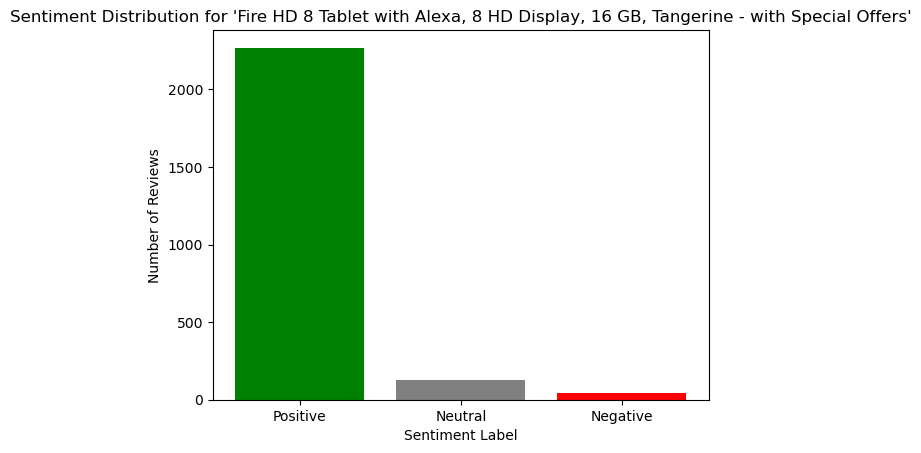


Menu:
1. Analyze product reviews
2. Compare products
3. Input random user reviews
4. Exit


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Download stopwords list if not already present
import nltk
nltk.download('stopwords')

def calculate_sentiment_score(sentence, positive_words, negative_words):
    # Tokenize the sentence
    words = sentence.lower().split()

    # Filter out common words (stop words)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Calculate sentiment score
    sentiment_score = sum(1 if word in positive_words else -1 if word in negative_words else 0 for word in words)

    return sentiment_score

def analyze_product_reviews(df, positive_words, negative_words, product_type):
    # Filter the dataset for the selected product type
    product_df = df[df['name'] == product_type]

    total_reviews = len(product_df)
    print(f"Total Reviews for '{product_type}': {total_reviews}\n")

    if total_reviews > 0:
        # Initialize counters for sentiment labels
        product_df['sentiment_label'] = product_df['reviews.text'].apply(lambda x: 1 if calculate_sentiment_score(x, positive_words, negative_words) > 0 else 0 if calculate_sentiment_score(x, positive_words, negative_words) == 0 else -1)
        positive_count = (product_df['sentiment_label'] == 1).sum()
        neutral_count = (product_df['sentiment_label'] == 0).sum()
        negative_count = (product_df['sentiment_label'] == -1).sum()

        # Display sentiment distribution
        print("Sentiment Distribution:")
        print(f"Positive: {positive_count} reviews")
        print(f"Neutral: {neutral_count} reviews")
        print(f"Negative: {negative_count} reviews")

        # Visualize sentiment distribution
        labels = ['Positive', 'Neutral', 'Negative']
        counts = [positive_count, neutral_count, negative_count]

        plt.bar(labels, counts, color=['green', 'gray', 'red'])
        plt.title(f"Sentiment Distribution for '{product_type}'")
        plt.xlabel("Sentiment Label")
        plt.ylabel("Number of Reviews")
        plt.show()

    return total_reviews

def compare_products(df, positive_words, negative_words, product_type_1, product_type_2):
    # Filter the dataset for the selected product types
    product_df_1 = df[df['name'] == product_type_1]
    product_df_2 = df[df['name'] == product_type_2]

    total_reviews_1 = analyze_product_reviews(df, positive_words, negative_words, product_type_1)
    total_reviews_2 = analyze_product_reviews(df, positive_words, negative_words, product_type_2)

    if total_reviews_1 == 0 or total_reviews_2 == 0:
        print("No reviews found for one or both of the selected products.")
        return

    # Calculate and display the percentage of positive reviews for each product
    product_df_1.loc[:, 'sentiment_label'] = product_df_1['reviews.text'].apply(lambda x: 1 if calculate_sentiment_score(x, positive_words, negative_words) > 0 else 0 if calculate_sentiment_score(x, positive_words, negative_words) == 0 else -1)
    product_df_2.loc[:, 'sentiment_label'] = product_df_2['reviews.text'].apply(lambda x: 1 if calculate_sentiment_score(x, positive_words, negative_words) > 0 else 0 if calculate_sentiment_score(x, positive_words, negative_words) == 0 else -1)

    positive_percentage_1 = (product_df_1['sentiment_label'] == 1).sum() / total_reviews_1 * 100
    positive_percentage_2 = (product_df_2['sentiment_label'] == 1).sum() / total_reviews_2 * 100

    print(f"Positive Review Percentage for '{product_type_1}': {positive_percentage_1:.2f}%")
    print(f"Positive Review Percentage for '{product_type_2}': {positive_percentage_2:.2f}%")



def random_user_reviews(df, positive_words, negative_words):
    # Input random user reviews
    product_type = input("Enter a product type for random user reviews: ")

    # Filter the dataset for the selected product type
    product_df = df[df['name'] == product_type]

    total_reviews = analyze_product_reviews(df, positive_words, negative_words, product_type)

    if total_reviews > 0:
        # Calculate and display the percentage of positive reviews for the selected product
        positive_percentage = (product_df['sentiment_label'] == 1).sum() / total_reviews * 100
        print(f"Positive Review Percentage for '{product_type}': {positive_percentage:.2f}%")

    random_reviews = []
    while True:
        user_review = input("Enter a random user review (or type 'exit' to stop): ")
        if user_review.lower() == 'exit':
            break
        random_reviews.append(user_review)

    if random_reviews:
        # Analyze sentiment for random user reviews
        analyze_random_user_reviews(df, positive_words, negative_words, product_type, random_reviews)

def analyze_random_user_reviews(df, positive_words, negative_words, product_type, random_reviews):
    # Filter the dataset for the selected product type
    product_df = df[df['name'] == product_type]

    # Iterate over random user reviews
    for i, review in enumerate(random_reviews, 1):
        # Calculate sentiment score
        score = calculate_sentiment_score(review, positive_words, negative_words)

        # Assign sentiment label based on threshold
        sentiment_label = 1 if score > 0 else -1 if score < 0 else 0

        print(f"Sentiment Score for random review {i}: {score}")
        print(f"Sentiment Label for random review {i}: {sentiment_label}\n")

def main():
    # Load the data
    word_list_df = pd.read_csv("Positive and Negative Word List.csv")

    # Extract positive and negative words
    positive_words = set(word_list_df['Positive Sense Word List'].dropna())
    negative_words = set(word_list_df['Negative Sense Word List'].dropna())

    # Load the Amazon dataset
    df = pd.read_csv("Amazon.csv")

    while True:
        # Display menu options
        print("\nMenu:")
        print("1. Analyze product reviews")
        print("2. Compare products")
        print("3. Input random user reviews")
        print("4. Exit")

        # Take user choice
        choice = input("Enter your choice (1/2/3/4): ")

        if choice == '1':
            # Take user input for product type
            product_type = input("Enter a product type for sentiment analysis: ")
            analyze_product_reviews(df, positive_words, negative_words, product_type)

        elif choice == '2':
            # Take user input for two product types
            product_type_1 = input("Enter the first product type for comparison: ")
            product_type_2 = input("Enter the second product type for comparison: ")
            compare_products(df, positive_words, negative_words, product_type_1, product_type_2)

        elif choice == '3':
            # Input random user reviews
            random_user_reviews(df, positive_words, negative_words)

        elif choice == '4':
            print("Exiting the program.")
            break

        else:
            print("Invalid choice. Please enter a valid option (1/2/3/4).")

if __name__ == "__main__":
    main()
